Sprintの目的
スクラッチを通して決定木を理解する
複雑なアルゴリズムの実装に慣れる

【問題1】不純度を求める関数
ノード の ジニ不純度 を計算する関数を作成してください。ノード 
t
 に対するジニ不純度 
I
(
t
)
 は以下の数式で求まります。クラスが混じり合っているほどジニ不純度は高くなります。


I
(
t
)
=
1
−
K
∑
i
=
1
 
P
2
(
C
i
|
t
)
=
1
−
K
∑
i
=
1
 
(
N
t
,
i
N
t
,
a
l
l
)
2

t
 : ノードのインデックス


i
 : クラスのインデックス


K
 : クラスの数


C
i
 : i番目のクラス


P
(
C
i
|
t
)
 :　t番目のノードにおける
C
i
の割合


N
t
,
i
 : t番目のノードのi番目のクラスに属するサンプル数


N
t
,
a
l
l
 : t番目のノードのサンプルの総数


まずは簡単な例を作り、手計算と関数の結果を比較してください。


《例》


クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500
クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度0.667
クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度0.480
クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度0.000

In [184]:
def ginifuc(K,Ntall,Nti):
  '''
  ジニ不純度求める関数
  入力値
  K: クラスの数
  Ntall:t番目のノードのサンプルの総数
  Nti:t番目のノードのi番目のクラスに属するサンプル数
  リスト形式

  出力
  return
  I(t):t番目のノードのジニ不純度
  gini=0初期値
  '''
  gini=0
  for i in range(K):
    gini += (Nt[i]/Ntall)**2 
  return 1-gini

#テスト 問題１の例で実施
#クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500
K=2
Ntall = 30
Nt=[15,15]
gini=ginifuc(K,Ntall,Nt)
print(gini)

#クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度0.667 
K=3
Ntall = 45
Nt=[15,15,15]
gini=ginifuc(K,Ntall,Nt)
print(gini)

#クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度0.480 
K=2
Ntall = 30
Nt=[18,12]
gini=ginifuc(K,Ntall,Nt)
print(gini)


#クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度0.000
K=2
Ntall = 30
Nt=[30,0]
gini=ginifuc(K,Ntall,Nt)
print(gini)

0.5
0.6666666666666667
0.48
0.0


【問題2】情報利得を求める関数
次に、ノード間の 情報利得 を計算する関数を作成してください。問題1で作成したジニ不純度 
I
(
t
)
 を計算する関数を呼び出して使います。情報利得
I
G
は以下の数式で求まります。うまく分けられている時ほど情報利得は大きくなります。


ここで分岐は2つのみであるため、分岐先を「左側のノード・右側のノード」と呼びます。


I
G
(
p
)
=
I
(
p
)
−
N
l
e
f
t
,
a
l
l
N
p
,
a
l
l
I
(
l
e
f
t
)
−
N
r
i
g
h
t
,
a
l
l
N
p
,
a
l
l
I
(
r
i
g
h
t
)

p
 : 親ノードを示すインデックス


l
e
f
t
 : 左側のノードを示すインデックス


r
i
g
h
t
 : 右側のノードを示すインデックス


まずは簡単な例を作り、手計算と関数の結果を比較してください。


《例》


左ノードクラス1:サンプル数10, 左ノードクラス2:サンプル数30, 右ノードクラス1:サンプル数20, 右ノードクラス2:サンプル数5 → 情報利得0.143

In [185]:
def InfoGain(I_p,I_left,I_right,Nleft,Nright,Nall):
  '''
  入力
  I(p)：全体のジニ不純度
  I(left)：左側の不純度
  I(right)：右側の不純度
  Nleft：左側のサンプル数
  Nright：右側のサンプル数
  Nall：全体のサンプル数
  出力
  情報利得
  return
  InfoGain
  '''
  print("入力値")
  print(I_p)
  print((Nleft/Nall))
  print(I_left)
  print((Nright/Nall))
  print(I_right)
  InfoGain=I_p-(Nleft/Nall)*I_left-(Nright/Nall)*I_right
  return InfoGain

'''
左ノードクラス1:サンプル数10, 左ノードクラス2:サンプル数30, 
右ノードクラス1:サンプル数20, 右ノードクラス2:サンプル数5 
→ 情報利得0.143
になるか確認します
'''

#左ノードクラス1:サンプル数10, 左ノードクラス2:サンプル数30 
K_p=2
Nall = 65
Nt_p=[40,25]
K=K_p
Ntall=Nall
Nt=Nt_p
I_p=ginifuc(K,Ntall,Nt)
print(I_p)

#左ノードクラス1:サンプル数10, 左ノードクラス2:サンプル数30 
K_left=2
Nleft=40
Nt_left=[10,30]
K=K_left
Ntall=Nleft
Nt=Nt_left
I_left=ginifuc(K,Ntall,Nt)
print(I_left)

#右ノードクラス1:サンプル数20, 右ノードクラス2:サンプル数5
K_right=2
Nright = 25
Nt_right=[20,5]
K=K_right
Ntall=Nright
Nt=Nt_right
I_right=ginifuc(K,Ntall,Nt)
print(I_right)



InforGain = InfoGain(I_p,I_left,I_right,Nleft,Nright,Nall)
print(InforGain)

0.47337278106508873
0.375
0.31999999999999984
入力値
0.47337278106508873
0.6153846153846154
0.375
0.38461538461538464
0.31999999999999984
0.11952662721893492


【問題3】学習
空間の分割を行い、決定木のグラフを生成するコードを作成してください。今は深さ1の決定木なので、分割を1回だけ行います。ここでグラフを生成するとは、1回の分割の際の条件としてどの特徴量がいくつ以上の時とするかを求めるということです。


訓練データに対してすべての組み合わせの分割を行い、その中でノード間の情報利得が最大となる分割をそのノードの分割基準として記録します。


クラスが混ざらない不純度が0のノード、または指定された深さのノードが 葉ノード となります。葉ノードにはクラスを記録しておき、これを推定時に分類するクラスとします。クラスが混ざらない場合はそのままのクラスを記録し、混ざっている場合は多数決により決めます。


《組み合わせの取り方》


すべての組み合わせの取り方は、最も単純には各特徴量の値自体をしきい値にして分割を行う方法があります。片側の端は今回のスクラッチはこの方法で行なってください。


他には中間の値をしきい値にする方法もあり、scikit-learnではこの方法が用いられています。


《補足》


問題2の情報利得を計算する関数はこの問題3で利用する上では、親ノードの不純度 
I
(
p
)
 は固定されるため、左右のノードの不純度の合計を計算するだけでも同じ結果が得られることになります。しかし、ここでは親ノードを考慮した情報利得を計算する実装を行なってください。

In [186]:
#DesicionTreeClassifierを定義しました。
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
 
def gini_score(data, target, feat_idx, threshold):
    gini = 0
    sample_num = len(target)
   
    div_target = [target[data[:, feat_idx] >= threshold], target[data[:, feat_idx] < threshold]]
   
    for group in div_target:
        score = 0
        classes = np.unique(group)
        for cls in classes:
            p = np.sum(group == cls)/len(group)
            score += p * p
        gini += (1- score) * (len(group)/sample_num)
    return gini
 
def search_best_split(data, target):   
    features = data.shape[1]
    best_thrs = None
    best_f = None
    gini = None
    gini_min = 1
 
    for feat_idx in range(features):
        values = data[:, feat_idx]
        for val in values:
            gini = gini_score(data, target, feat_idx, val)
            if gini_min > gini:
                gini_min = gini
                best_thrs = val
                best_f = feat_idx
    return gini_min, best_thrs, best_f       
 
class DecisionTreeNode(object):
    def __init__(self, data, target, max_depth):
        self.left = None
        self.right = None
        self.max_depth = max_depth
        self.depth = None
        self.data = data
        self.target = target
        self.threshold = None
        self.feature = None
        self.gini_min = None
        self.label = np.argmax(np.bincount(target))
   
    def split(self, depth):
        self.depth = depth
        self.gini_min, self.threshold, self.feature = search_best_split(self.data, self.target)
        # print('Depth: {}, Sep at Feature: {},Threshold: {}, Label: {}'.format(self.depth, self.feature, self.threshold, self.label))
       
        if self.depth == self.max_depth or self.gini_min == 0:
            return       
        idx_left = self.data[:, self.feature] >= self.threshold
        idx_right = self.data[:, self.feature] < self.threshold
   
        self.left = DecisionTreeNode(self.data[idx_left],  self.target[idx_left], self.max_depth)
        self.right = DecisionTreeNode(self.data[idx_right], self.target[idx_right], self.max_depth)
        self.left.split(self.depth +1)
        self.right.split(self.depth +1)
 
    def predict(self, data):
        if self.gini_min == 0.0 or self.depth == self.max_depth:
            return self.label
        else:
            if data[self.feature] > self.threshold:
                return self.left.predict(data)
            else:
               return self.right.predict(data)
 
class ScratchDecesionTreeClassifierDepth1(object):
    """
    深さ1の決定木分類器のスクラッチ実装
    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, max_depth):
        self.max_depth = max_depth
        self.tree = None
   
    def fit(self, data, target):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        initial_depth = 0
        self.tree = DecisionTreeNode(data, target, self.max_depth)
        self.tree.split(initial_depth)
   
    def predict(self, data):
        """
        決定木分類器を使いラベルを推定する
        """
        pred = []
        for s in data:
            pred.append(self.tree.predict(s))
        return np.array(pred)



【問題4】推定
推定する仕組みを実装してください。ScratchDecesionTreeClassifierDepth1クラスの雛形に含まれるpredictメソッドに書き加えてください。


入力されたデータの値を学習した条件で判定していき、どの葉ノードに到達するかを見ます。葉ノードにはクラスが記録されているので、これが推定値となります。



In [187]:
#問題３に記載しました

【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット2の2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。



In [188]:
from sklearn import linear_model, metrics, preprocessing #機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

#シンプルデータセット2作成コード
X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
 
clf = ScratchDecesionTreeClassifierDepth1(max_depth=1)
clf.fit(X_train, y_train)
#正答率を求める
y_pred = clf.predict(X_test)
score = sum(y_pred == y_test)/float(len(y_test))
# print('Classification accuracy: {}'.format(score))

# print("予測値=",y_pred)
# ac_score3=metrics.accuracy_score(y_test,y_pred)
# print("正答率 = ",ac_score3)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.67      0.40      0.50         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10



In [189]:
#sklearnによる決定木の実装 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


#シンプルデータセット2作成コード
X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

from sklearn.metrics import classification_report
import pandas as pd
import pprint

#訓練データ75%、検証データ25%として分割
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, train_size= 0.75, test_size=0.25, random_state=0)
# NN learning
#clf = MLPClassifier()
neigh4 = DecisionTreeClassifier()
# lerning
# clf.fit(data_train, target_train)
model4 = neigh4.fit(X_train4,y_train4)
# preedict test data
# predict = clf.predict(data_test)
predict4 = model4.predict(X_test4)
# checking answer
y_true_multi4=y_test4
y_pred_multi4=predict4
print(classification_report(y_true_multi4, y_pred_multi4)) 




              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



よって、scikit-learnによる実装と比べ、正しく動いている

【問題6】決定領域の可視化
決定領域を可視化してください。



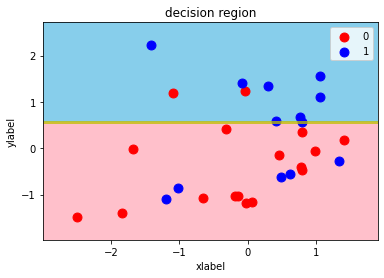

In [190]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np
import itertools

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC



#シンプルデータセット2作成コード
X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#訓練データ75%、検証データ25%として分割
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, test_size=0.25)


#標準化は「平均が0、標準偏差が1になるようにデータを加工（スケーリング）」し、正規化は「最低が0、最高が1になるようにデータを加工（スケーリング）する」モジュールと説明されています。
#標準化（standardization） と 正規化（normalization）
from sklearn.preprocessing import StandardScaler


X_train_data = X_train 
scaler = StandardScaler()
scaler.fit(X_train_data)
scaler.transform(X_train_data)

X_test_data = X_test 
scaler.transform(X_test_data)

y_train_data = y_train 
# scaler.fit(y_train_data)
# scaler.transform(y_train_data)

y_test_data = y_test 
# scaler.transform(y_test_data)



def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['0', '1']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

#訓練データをプロット
X1=scaler.transform(X_train_data)
clf = ScratchDecesionTreeClassifierDepth1(max_depth=1)
clf.fit(X1, y_train_data)
# model = neigh.fit(X1,y1)
decision_region(X1, y_train_data, clf, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['0', '1'])

